In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [ ]:
pip install matplotlib

In [135]:
import numpy as np

In [164]:
# Take in matrix1, matrix2, and our optimal n0
def standard(mat1, mat2):
    if mat1.shape[1] != mat2.shape[0]:
        raise Exception("Invalid Matrices")
    return np.dot(mat1, mat2)



In [169]:
# Take in matrix1, matrix2, and our optimal n0
def strassen(matrix1, matrix2, n0):
    
    # Check dimensions to ensure multiply is somethin we can do
    if matrix1.shape[1] != matrix2.shape[0]: 
        raise Exception("Invalid Matrices")
    
    # If the size of the matrices is less than or equal to the crossover point (n0),
    # use the standard matrix multiplication algorithm instead of Strassen's.
    if matrix1.shape[0] <= n0:
        return standard(matrix1, matrix2)
    
    padding = False  # Initialize a flag to check if padding is needed.
    
    # If the dimension of the matrix is odd:
    # Pad the matrices with zeros to make their dimensions even, allowing them to be divided evenly!
    if matrix1.shape[0] % 2 != 0:
        padding = True
        matrix1 = np.pad(matrix1, ((0,1), (0,1)), mode='constant', constant_values=0)
        matrix2 = np.pad(matrix2, ((0,1), (0,1)), mode='constant', constant_values=0)
    
    # Divide the input matrices into submatrices so we can divide and conquer
    n = int(matrix1.shape[0] // 2)
    a, b, c, d = matrix1[:n, :n], matrix1[:n, n:], matrix1[n:, :n], matrix1[n:, n:]
    e, f, g, h = matrix2[:n, :n], matrix2[:n, n:], matrix2[n:, :n], matrix2[n:, n:]

    # Compute the 7 products needed for Strassen's algorithm recursively.
    
    # I believe we can use these np.__ ** make sure to double check Ed later juuust in case 
    p1 = strassen(a, np.subtract(f, h), n0)
    p2 = strassen(np.add(a, b), h, n0)
    p3 = strassen(np.add(c, d), e, n0)
    p4 = strassen(d, np.subtract(g, e), n0)
    p5 = strassen(np.add(a, d), np.add(e, h), n0)
    p6 = strassen(np.subtract(b, d), np.add(g, h), n0)
    p7 = strassen(np.subtract(c, a), np.add(e, f), n0)
    
    # Combine the products to form the four quadrants of the result matrix.
    topleft = np.add(np.add(np.subtract(p4,p2), p5), p6)
    topright = np.add(p1, p2)
    bottomleft = np.add(p3, p4)
    bottomright = np.add(np.add(np.subtract(p1, p3), p5), p7)
    
    # Put everything together now! We can do this with concatenate, but again just double chek Ed?
    # Also learned somethign new, numpy we need define these things for axis
    top, bottom = np.concatenate((topleft, topright), axis=1), np.concatenate((bottomleft, bottomright), axis=1)
    result = np.concatenate((top, bottom), axis=0)

    # If padding was added, remove the added row and column to match the original dimensions.
    if padding:
        result = result[:matrix1.shape[0]-1, :matrix1.shape[0]-1]

    return result

In [185]:
def generate_matrix(n):
    return np.array([[random.randint(0, 20) for _ in range(n)] for _ in range(n)])



In [182]:

print(strassen(matrix, matrix, matrix.shape[0]//2 +1))

[[384 240]
 [400 304]]


In [198]:
# odd dimension
odd_stras_list = []
odd_conv_list = []
# odd
for dim in range(1,200):
    avg_strass = 0
    avg_conv = 0
    for i in range(1):        
        odd_val = dim * 2 + 1
        matrix1 = generate_matrix(odd_val)
        matrix2 = matrix1
        
        start = time.time()
        matmult = strassen(matrix1, matrix2, odd_val - 1)
        
        end = time.time()
        avg_strass += (end - start)
        #conv
        start = time.time()
        matmult2 = standard(matrix1, matrix2)
        end = time.time()
        avg_conv += (end - start)
    avg_strass /= 1
    avg_conv /= 1
    odd_stras_list.append(avg_strass)
    odd_conv_list.append(avg_conv)
    
even_stras_list = []
even_conv_list = []
# even dimension
for dim in range(1,200):
    avg_strass = 0
    avg_conv = 0
    for i in range(1):        
        even_val = dim * 2  
        matrix1 = generate_matrix(even_val)
        matrix2 = matrix1
        start = time.time()
        matmult = strassen(matrix1, matrix2, even_val - 1)
        end = time.time()
        avg_strass += (end - start)
        #conv
        start = time.time()
        matmult2 = standard(matrix1, matrix2)
        end = time.time()
        avg_conv += (end - start)
    avg_strass /= 1
    avg_conv /= 1
    even_stras_list.append(avg_strass)
    even_conv_list.append(avg_conv)


In [199]:
odd_stras_list

[0.0005059242248535156,
 0.00034499168395996094,
 0.00048065185546875,
 0.00033783912658691406,
 0.00044417381286621094,
 0.00015401840209960938,
 9.298324584960938e-05,
 8.58306884765625e-05,
 9.083747863769531e-05,
 8.7738037109375e-05,
 8.893013000488281e-05,
 0.00026988983154296875,
 8.487701416015625e-05,
 8.606910705566406e-05,
 8.797645568847656e-05,
 9.393692016601562e-05,
 9.703636169433594e-05,
 0.00010991096496582031,
 0.00011014938354492188,
 0.00011682510375976562,
 0.00020194053649902344,
 0.0001430511474609375,
 0.0001289844512939453,
 0.00013399124145507812,
 0.000209808349609375,
 0.0001499652862548828,
 0.0001590251922607422,
 0.000164031982421875,
 0.00017404556274414062,
 0.00023698806762695312,
 0.0002009868621826172,
 0.0004899501800537109,
 0.00023698806762695312,
 0.0002689361572265625,
 0.00024127960205078125,
 0.00028824806213378906,
 0.0004999637603759766,
 0.0002989768981933594,
 0.00029277801513671875,
 0.00028586387634277344,
 0.0003941059112548828,
 0.000

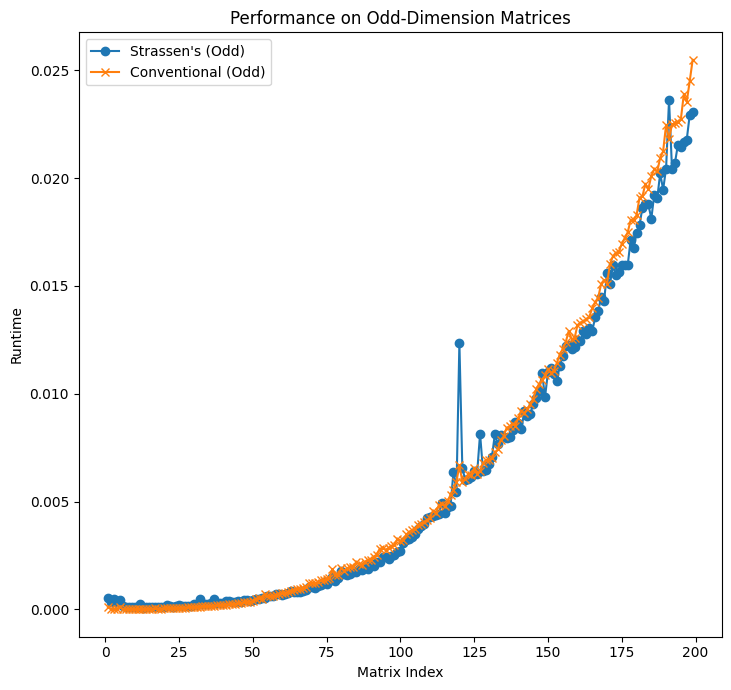

In [200]:
even_indices = list(range(1, len(even_stras_list) + 1))
odd_indices = list(range(1, len(odd_stras_list) + 1))

# Plotting
plt.figure(figsize=(14, 7))



# Plot for odd indices
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(odd_indices, odd_stras_list, label="Strassen's (Odd)", marker='o')
plt.plot(odd_indices, odd_conv_list, label="Conventional (Odd)", marker='x')
plt.title("Performance on Odd-Dimension Matrices")
plt.xlabel("Matrix Index")
plt.ylabel("Runtime")
plt.legend()

plt.tight_layout()
plt.show()

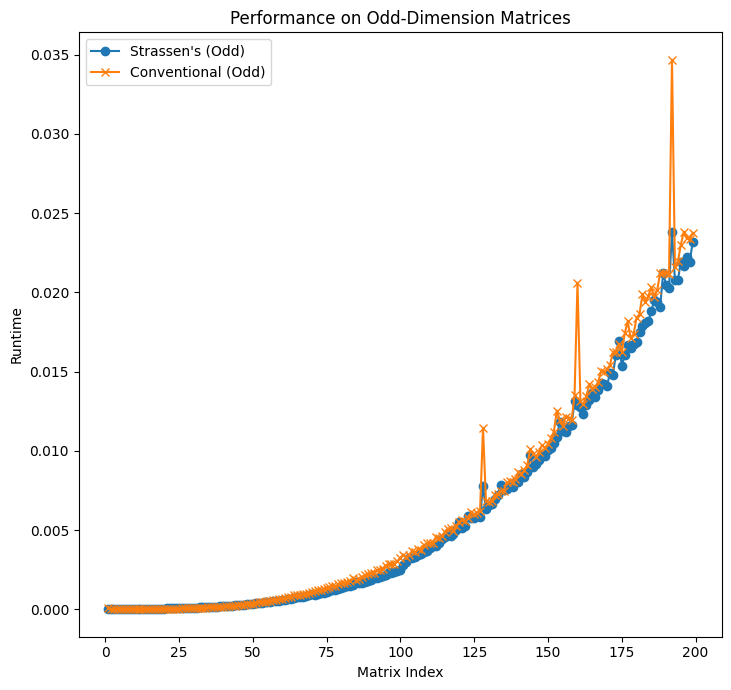

In [202]:
even_indices = list(range(1, len(even_stras_list) + 1))
odd_indices = list(range(1, len(odd_stras_list) + 1))

# Plotting
plt.figure(figsize=(14, 7))



# Plot for odd indices
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(even_indices, even_stras_list, label="Strassen's (Odd)", marker='o')
plt.plot(even_indices, even_conv_list, label="Conventional (Odd)", marker='x')
plt.title("Performance on Odd-Dimension Matrices")
plt.xlabel("Matrix Index")
plt.ylabel("Runtime")
plt.legend()

plt.tight_layout()
plt.show()

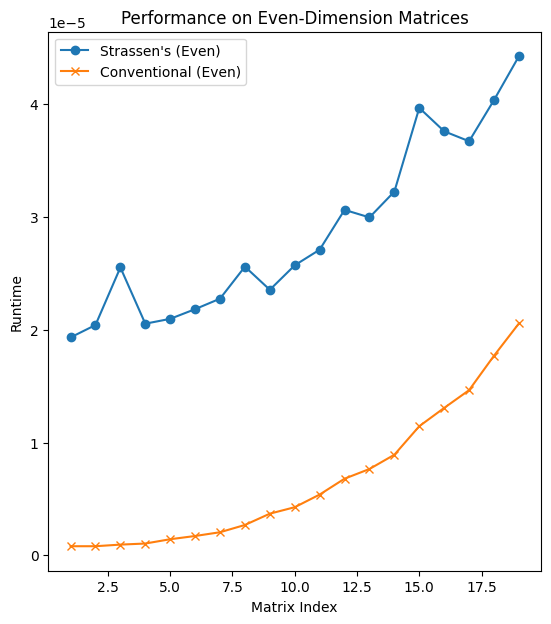

In [195]:
# Plot for even indices
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(even_indices, even_stras_list, label="Strassen's (Even)", marker='o')
plt.plot(even_indices, even_conv_list, label="Conventional (Even)", marker='x')
plt.title("Performance on Even-Dimension Matrices")
plt.xlabel("Matrix Index")
plt.ylabel("Runtime")
plt.legend()


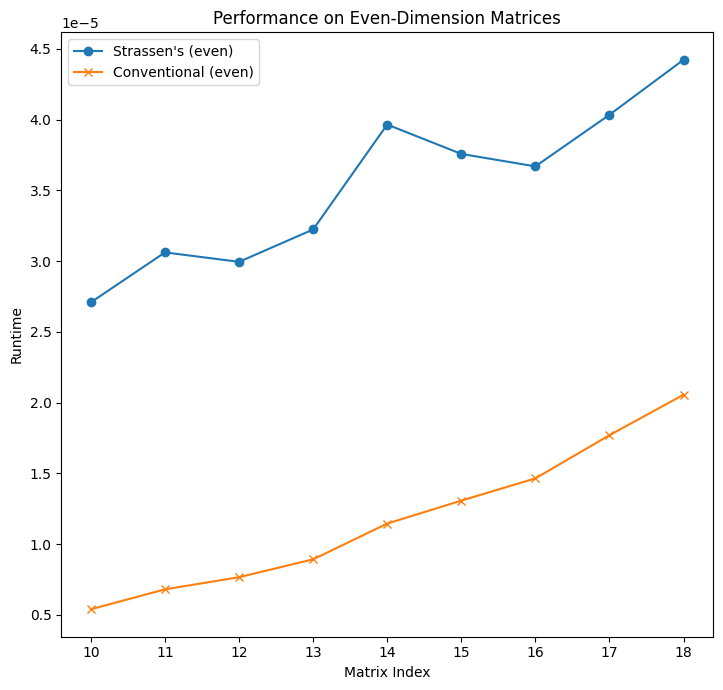

In [196]:
closer_even = list(range(10, 19))  # Correctly defined for even-dimensional matrices
even_closer_stras = even_stras_list[10:19]  # Slicing for closer inspection
even_closer_conv = even_conv_list[10:19]  # Correctly using even_conv_list now

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(closer_even, even_closer_stras, label="Strassen's (even)", marker='o')
plt.plot(closer_even, even_closer_conv, label="Conventional (even)", marker='x')  # Use closer_even here
plt.title("Performance on Even-Dimension Matrices")  # Corrected title
plt.xlabel("Matrix Index")
plt.ylabel("Runtime")
plt.legend()

plt.tight_layout()
plt.show()